<a href="https://colab.research.google.com/github/BlancaCC/Computer-vision/blob/p1/practica_0/Pr%C3%A1ctica_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 0 
Blanca Cano Camarero DGIIM

Toda esta práctica será realizada con opencv de python luego será necesario importar la biblioteca respectiva. 

In [1]:
import cv2
import numpy as np

# Rutas posibles
colab =  '/content/drive/MyDrive/Visión por computador/práctica 0/images/'
local = './images/'
ruta_actual = local

if(ruta_actual == colab): 
    from google.colab import drive
    drive.mount('/content/drive')

# Path de las imágenes 
path_dave = ruta_actual +'dave.jpg'
path_messi = ruta_actual + 'messi.jpg'
path_orapple = ruta_actual +'orapple.jpg'
path_logo = ruta_actual +'logoOpenCV.jpg'

todas_imagenes = [path_dave, path_logo, path_messi, path_orapple]



## **Ejercicio** 1
Escribir una función que lea el fichero de una imagen y permita mostrarla
tanto en grises como en color (im=leeimagen(filename, flagColor)).
flagColor es la variable que determina si la imagen se muestra en escala
de grises o en color.

### Explicación de la solución  
Usaremos la función propia de cv2 imread. 
`imread(path, flag)`, que muestra el path de la imagen y flag el método en que la variable será leída.  

Los flags que nos van a ser útiles son:  
- `cv2.IMREAD_COLOR` para color 
- `cv2.IMREAD_GRAYSCALE` Modo de escala de grises. 

Recursos utilizados (fecha de consulta 24/09/21): 

[Geekforgeek](https://www.geeksforgeeks.org/python-opencv-cv2-imread-method/)


In [44]:
def leeImagen(filename, flagColor):
  '''
  @param filename: nombre de la foto 
  @para flagColor: boolean escala de grises o color
  '''
  return cv2.imread(filename, flagColor)

## Ejemplos de uso de la función 
#from google.colab.patches import cv2_imshow # Para mostrar imágenes
## Flags
flagColor = cv2.IMREAD_ANYCOLOR
flagGrey = cv2.IMREAD_GRAYSCALE

#orapple 
img_orapple_color = leeImagen(path_orapple, flagColor) 
#cv2_imshow(img_orapple_color) # Ejemplo para comprobar que funciona
img_orapple_gris = leeImagen(path_orapple, flagGrey)
#cv2_imshow(img_orapple_gris)
# messi
img_messi_color = leeImagen(path_messi, flagColor) # como vemos si la imagen está en blanco y negro no le afecta
#cv2_imshow(img_messi_color)
img_messi_gris = leeImagen(path_messi, flagGrey)
#cv2_imshow(img_messi_gris)

## Crearemos imagen del resto para el resto de path
imagenes_color = list(map( lambda img : leeImagen( img, flagColor), todas_imagenes))
imagenes_gris = list(map( lambda img : leeImagen( img, flagGrey), todas_imagenes))


## Ejercicio 2

Escribir una función que permita visualizar una matriz de números reales
cualquiera/arbitraria, tanto monobanda como tribanda (pintaI(im)). Para
ello se deberá escalar el rango de cada banda al intervalo [0,1] sin pérdida
de información.

### Explicación    

Vamos a mostrarlo con la biblioteca de mathplotlib

Otra opción (implementada en pintaI2
la función `cv2.imshow` no es posible usarla en colab, luego hemos usado una alternativa proporcionada por google 
Hemos usado este ejemplo
[Link ejemplo colab](
https://colab.researchb.google.com/github/xn2333/OpenCV/blob/master/Image_Processing_in_Python_Final.ipynb#scrollTo=6dy-iP-VTib)

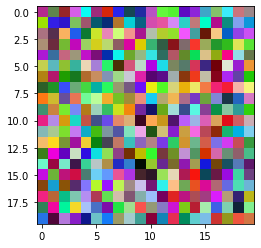

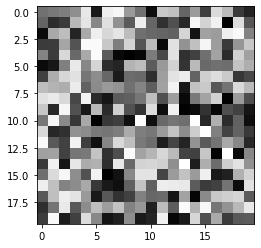

In [5]:
import matplotlib.pyplot as plt
import numpy as np
def pintaI(imagen, titulo=""):
    plt.title(titulo)
    # si la imagen es tribanda, tenemos que invertir los canales B y R
    # si es en blanco y negro, tenemos que decirle a matplotlib que es monobanda
    if imagen.ndim == 3 and imagen.shape[2] >= 3:
        plt.imshow(imagen[:,:,::-1])
    else:
        plt.imshow(imagen, cmap='gray')
    plt.show()


def pintaI2(im):
  """Visualiza una matriz de números reales cualquiera
     - im: Imagen a visualizar"""
  cv2_imshow(im)

## Ejemplo colores la matriz aleatoria 
# La escala iría en el intervali  [0,1] por ello no se ha cambiado la escala
random_img_color = np.random.rand(20, 20, 3)
random_img_gray = np.random.rand(20,20)
pintaI(random_img_color)
pintaI(random_img_gray)

## Ejercicio 3
Escribir una función que visualice varias imágenes distintas a la vez
(concatenando las imágenes en una última imagen final 1 ): pintaMI(vim).
(vim será una secuencia de imágenes) ¿Qué pasa si las imágenes no son
todas del mismo tipo?

### Descripción 

Pretendemos visualizar varias imágenes concatenadas. 
La descripción general del algoritmo es:
1. Criterio para manejar las que estén en color y las que no.
2. Ajustar tamaño
3. Concatenar. 

La soluciones aportadas:
1. Se pasan todas a color gracias a la función `cv2.cvtColor`.
2. Deben de ser del mismo tamaño: hemos optado por escalar la alturas hasta el tamaño de la mayor.
Esto se hace por medio de la función de `cv2.resize`
La documentación seguida ha sido la de la página oficial  a día  29 de septiembre 
[link](https://docs.opencv.org/3.4.15/dd/d52/tutorial_js_geometric_transformations.html)
3. Concatenamos las sucesivas imágenes. 

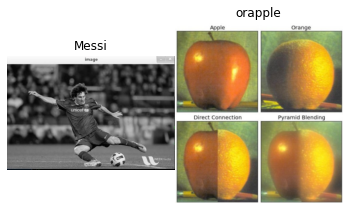

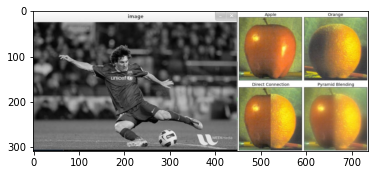

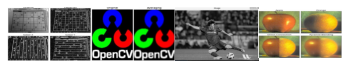

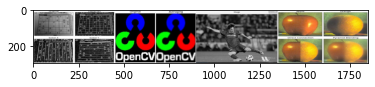

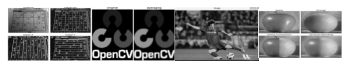

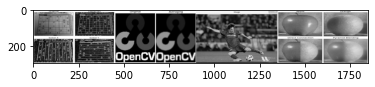

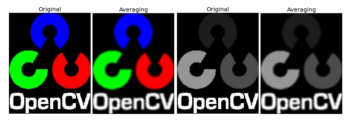

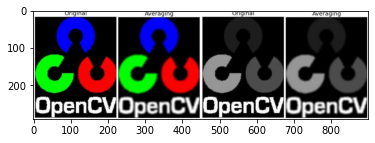

In [69]:
def pintaMI9(v_img, title = ""):
    # Altura mínima de las imágenes
    altura_minima = min(img.shape[0] for img in v_img)

    numero_imagenes = len(v_img)
    # Preparamos grid
    fig = plt.figure()
    # Añadimos un ínico title 
    if( type(title) == str and len(title)>0):
        fig.suptitle(title)
        
    for i in range(numero_imagenes):
        # Escalamos la altura a la más grande
        if v_img[i].shape[0] > altura_minima: 
            ancho_reescalado = int(v_img[i].shape[1]*altura_minima/v_img[i].shape[0])
            v_img[i] = cv2.resize(v_img[i], (ancho_reescalado, altura_minima),  interpolation=cv2.INTER_AREA)
        print(v_img[i].shape[0], v_img[i].shape[1], title[i])
        # pasamos a tribanda si está en monobanda
        if len(v_img[i].shape) != 3: 
            v_img[i] = cv2.cvtColor(v_img[i], cv2.COLOR_GRAY2RGB)
        # Añadimos título si lo tiene  
        if type(title)==list and len(title)>i:
            plt.title(title[i])
        #Quitamos ejes    
        plt.axis('off')
        # Mostramos imagen(que está a color) invirtiendo colores
        plt.imshow(v_img[i][:,:,::-1])
    img_v = cv2.hconcat(v_img)
    plt.show()
    plt.clf()
    pintaI(img_v)
    
    
    
    
def pintaMI(v_img, title = ""):
    # Altura mínima de las imágenes
    altura_minima = min(img.shape[0] for img in v_img)

    numero_imagenes = len(v_img)
    # Preparamos grid
    fig = plt.figure()
    gs = fig.add_gridspec(1,numero_imagenes, wspace=0, hspace=0)
    axs = gs.subplots(sharex='col', sharey='row')
    # Añadimos un ínico title 
        
    for i in range(numero_imagenes):
        # Escalamos la altura a la más grande
        if v_img[i].shape[0] > altura_minima: 
            ancho_reescalado = int(v_img[i].shape[1]*altura_minima/v_img[i].shape[0])
            v_img[i] = cv2.resize(v_img[i], (ancho_reescalado, altura_minima),  interpolation=cv2.INTER_AREA)
        #print(v_img[i].shape[0], v_img[i].shape[1], title[i])
        # pasamos a tribanda si está en monobanda
        if len(v_img[i].shape) != 3: 
            v_img[i] = cv2.cvtColor(v_img[i], cv2.COLOR_GRAY2RGB)
        # Añadimos título si lo tiene  
        if type(title)==list and len(title)>i:
            axs[i].set_title(title[i])
        #Quitamos ejes    
        axs[i].axis('off')
        # Mostramos imagen(que está a color) invirtiendo colores
        axs[i].imshow(v_img[i][:,:,::-1])
    img_v = cv2.hconcat(v_img)
    plt.show()
    plt.clf()
    pintaI(img_v)

        
## Ejecución de ejemplo 
pintaMI ( [img_messi_color, img_orapple_color], ['Messi','orapple'])
pintaMI(imagenes_color, 'Todas pintadas en color')
pintaMI(imagenes_gris, 'Todas pintadas en Gris')

# ¿Qué corre si mezclamos una en blanco y negro con otra en color?
pintaMI( [imagenes_color[1], imagenes_gris[1]], 'Mezclamos color con blanco y negro')
# Lo hace sin problema gracias a que lo transformamos a color

# Ejercicio 4
4. Escribir una función que modifique el color en la imagen de cada uno de
los elementos de una lista de coordenadas de píxeles 2 . En concreto, los
alumnos deben insertar un cuadrado azul de 100x100 pixeles en el centro
de la imagen a modificar.

## Descripción general del procedimiento

Dado que las imágenes no dejan de ser matrices, cambiaremos el color de las entradas pedidas. 
La función `CambiaPixeles` permite cambiar el color de píxeles de la lista de manera genérica. 
`InsertaCuadradoAzul` es la función que resuleve nuestro problema. 

Detalles que se han tenido en cuenta: 
1. El color se encuentra en BGR en vez de RGB y va de 0 a 255. 
2. Los ejes están girados 90º en sentido horario con centro en el origen con respecto al sistema que estamos acostumbrados. 



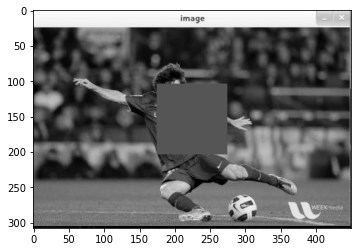

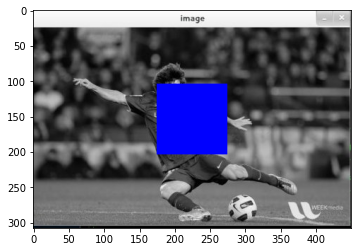

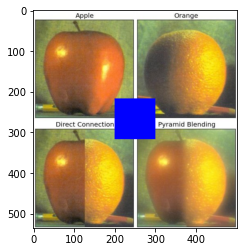

In [50]:
def CambiaPixeles ( imagen, pixeles, color):
  '''
    imagen: imagen a cambiar
    pixeles: lista de píxeles que se desean cambiar
    colores: lista de colores, el color i-ésimo se corresponde al del pixel i-ésimo de la lista de píxeles. 
  '''
  imagen_nueva = np.copy(imagen)
  # mejor copiarla y devolver la copiada!!!
  # si la imagen es gris 
  if len(imagen_nueva.shape) != 3: 
    color = sum(color)/3
  for (x,y) in pixeles: 
    imagen_nueva[(x,y)] = color
    
  return imagen_nueva


def InsertarCuadradoAzul (imagen): 
  '''Inserta en el centro de "imagen" un cuadrado de lado 100px pixéles
  '''
  tam_cuadrado = 100 # numero de pixeles de lado que tendrá el cuadrado
  # color azul en BGR
  color_azul = np.array([255,0,0], np.float64) 

  # cálculo de coordenadas de los píxeles teniendo en cuenta inversión (x,y de coordenadas)
  x_inicial = (imagen.shape[0]-tam_cuadrado)//2
  x_final = x_inicial + tam_cuadrado
  y_inicial = (imagen.shape [1]- tam_cuadrado)//2
  y_final = y_inicial + tam_cuadrado

  pixeles = [(x,y) for x in range(x_inicial, x_final) 
    for y in range(y_inicial, y_final)]
 
  imagenConCuadrado = CambiaPixeles(imagen, pixeles, color_azul)
  return imagenConCuadrado

## Ejecución del ejercicio con la foto de messi 
messiGrisCuadrado = InsertarCuadradoAzul(img_messi_gris)
messiColorCuadrado = InsertarCuadradoAzul(img_messi_color)
naranjaCuadrado = InsertarCuadradoAzul(img_orapple_color )
pintaI(messiGrisCuadrado)
pintaI(messiColorCuadrado)
pintaI(naranjaCuadrado)

# Ejercicio 5
5.Una función que sea capaz de representar varias imágenes con sus títulos en una misma ventana.

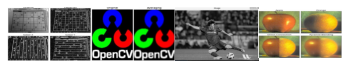

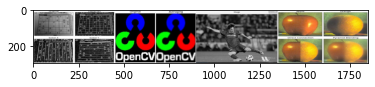

In [70]:
def multiplesImagenConTitulo(v_image, v_titulo ):
  titulo = ', '.join(v_titulo[:-1]) + ' y ' + v_titulo[-1]
  return pintaMI(v_image, titulo)

multiplesImagenConTitulo(imagenes_color, ['Sudokus', 'Logo', 'Messi', 'Naranja'])